# Titanic Ship

![Titanic](titanicprimary.png)

Titanic was a British passenger liner that sank in the North Atlantic Ocean in 1912.

## Key Findings

Based on the EDA of the Titanic dataset, the following conclusions can be drawn:

1. **Survival Rate**

   - **Finding**: The survival rate was significantly lower than the non-survival rate.
   - **Conclusion**: Overall, Titanic had a low survival rate.

2. **Effect of Gender on Survival**

   - **Finding**: Women had a much higher survival rate compared to men.
   - **Conclusion**: Women had a better chance of surviving, likely due to the "women and children first" policy.

3. **Effect of Passenger Class on Survival**

   - **Finding**: Passengers in first class had a higher survival rate than those in third class.
   - **Conclusion**: Socioeconomic status, represented by passenger class, affected survival chances, with first-class passengers closer to lifeboats.

4. **Effect of Age on Survival**

   - **Finding**: The average age of survivors was slightly lower, and children had a higher chance of survival.
   - **Conclusion**: Age influenced survival chances, with children having a better survival rate.

5. **Effect of Family Size on Survival**

   - **Finding**: Passengers traveling with family (siblings/spouses or parents/children) had a higher survival rate.
   - **Conclusion**: Having family members on board may have improved survival chances, as they could assist each other.

6. **Effect of Embarkation Port on Survival**
   - **Finding**: Passengers who boarded from Cherbourg had a higher survival rate compared to those from other ports.
   - **Conclusion**: This may be related to class distribution, with more first-class passengers boarding from Cherbourg.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Data Loading and Cleaning

Here, the Titanic dataset is loaded and cleaned for analysis.

In [2]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

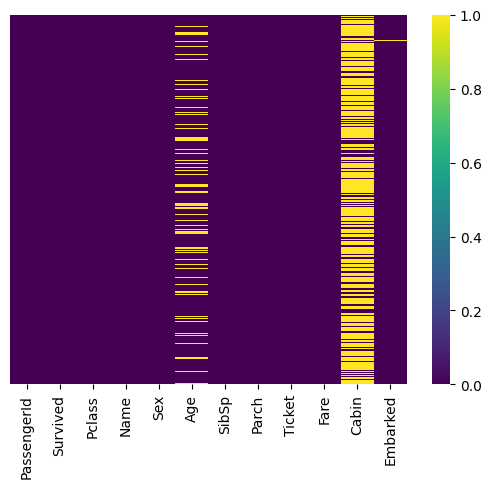

In [8]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap="viridis")

In [9]:
data.drop(["Cabin"], inplace=True, axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [10]:
median_age = data["Age"].median()
data["Age"] = data["Age"].fillna(median_age)


In [11]:
most_frequent_embarked = data["Embarked"].mode()[0]
data["Embarked"] = data["Embarked"].fillna(most_frequent_embarked)

In [12]:
mean_fare = data["Fare"].mean()
data["Fare"] = data["Fare"].fillna(mean_fare)


In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [15]:
data.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [16]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [17]:
# survival percentage based on gender

survival_by_gender = data.groupby('Sex')['Survived'].mean() * 100
survival_by_gender


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [18]:
children_survived = data[data['Age'] < 10]['Survived'].mean() * 100
print(f"Survival rate for children under the age of 10: {children_survived:.2f}%")


Survival rate for children under the age of 10: 61.29%


In [19]:
avg_survived = data[(data['Age'] <= 18) & (data['Age'] > 10)]['Survived'].mean() * 100
print(f"Survival rate for adults between 18 and 10: {avg_survived:.2f}%")

Survival rate for adults between 18 and 10: 42.67%


In [20]:
adult_survived = data[data['Age'] >= 18]['Survived'].mean() * 100
print(f"Survival rate for adults over the age of 18: {adult_survived:.2f}%")

Survival rate for adults over the age of 18: 36.12%


In [21]:
survival_by_class = data.groupby('Pclass')['Survived'].mean() * 100
survival_by_class

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [22]:
data['FamilySize'] = data['SibSp'] + data['Parch']

survival_with_family = data[data['FamilySize'] > 0]['Survived'].mean() * 100
print(f"Survival rate for passengers with family: {survival_with_family:.2f}%")


Survival rate for passengers with family: 50.56%


## Visualization

In this section, will analyze the data using a variety of visualizations.


### More related to Gender

#### Distribution of Gender

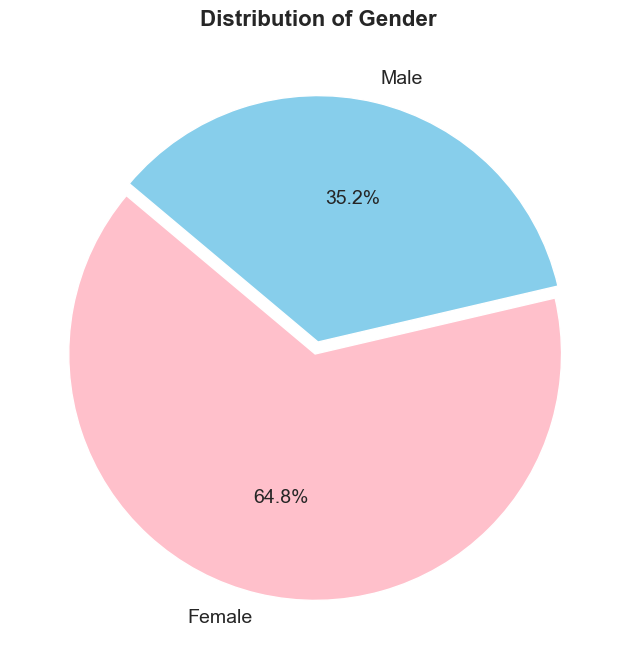

In [50]:
gender_counts = data["Sex"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(
    gender_counts,
    labels=["Female", "Male"],
    autopct="%1.1f%%",
    startangle=140,
    colors=["pink", "skyblue"],
    textprops={"fontsize": 14},  
    explode=(0.05, 0),  
)
plt.title("Distribution of Gender", fontsize=16, fontweight="bold")
plt.show()

#### Survival Rate by Gender and Embarked Town

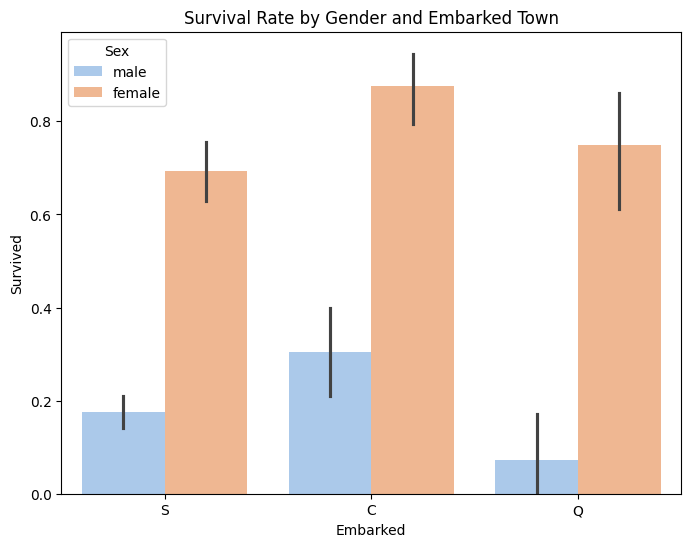

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=data, palette="pastel")
plt.title("Survival Rate by Gender and Embarked Town")
plt.show()


#### Gender vs. Survival

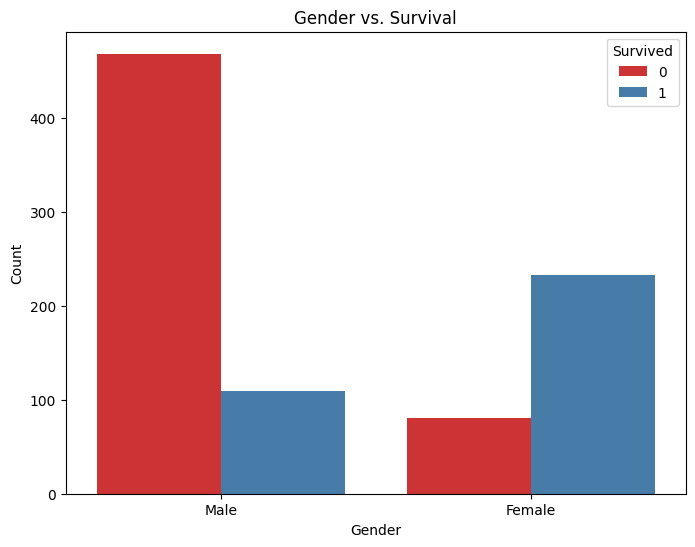

In [25]:

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Sex", hue="Survived", palette="Set1")
plt.title("Gender vs. Survival")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], ["Male", "Female"])
plt.show()

#### Number of Passengers by Gender and Passenger Class

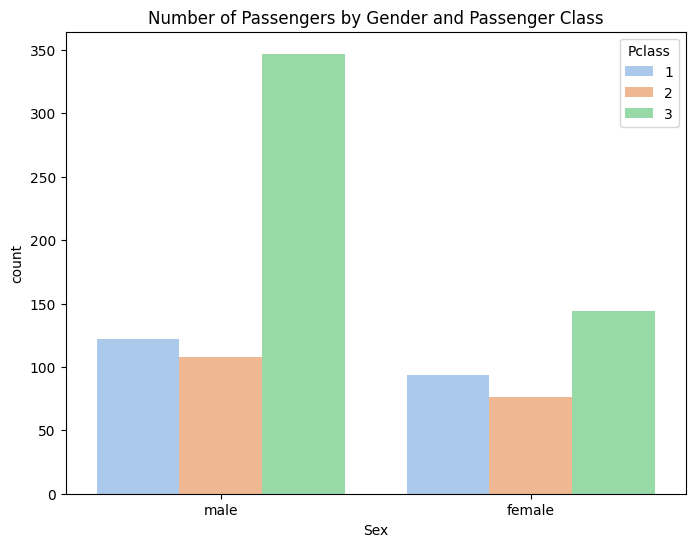

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Pclass', data=data, palette="pastel")
plt.title("Number of Passengers by Gender and Passenger Class")
plt.show()

#### Age Distribution of Survivors by Gender

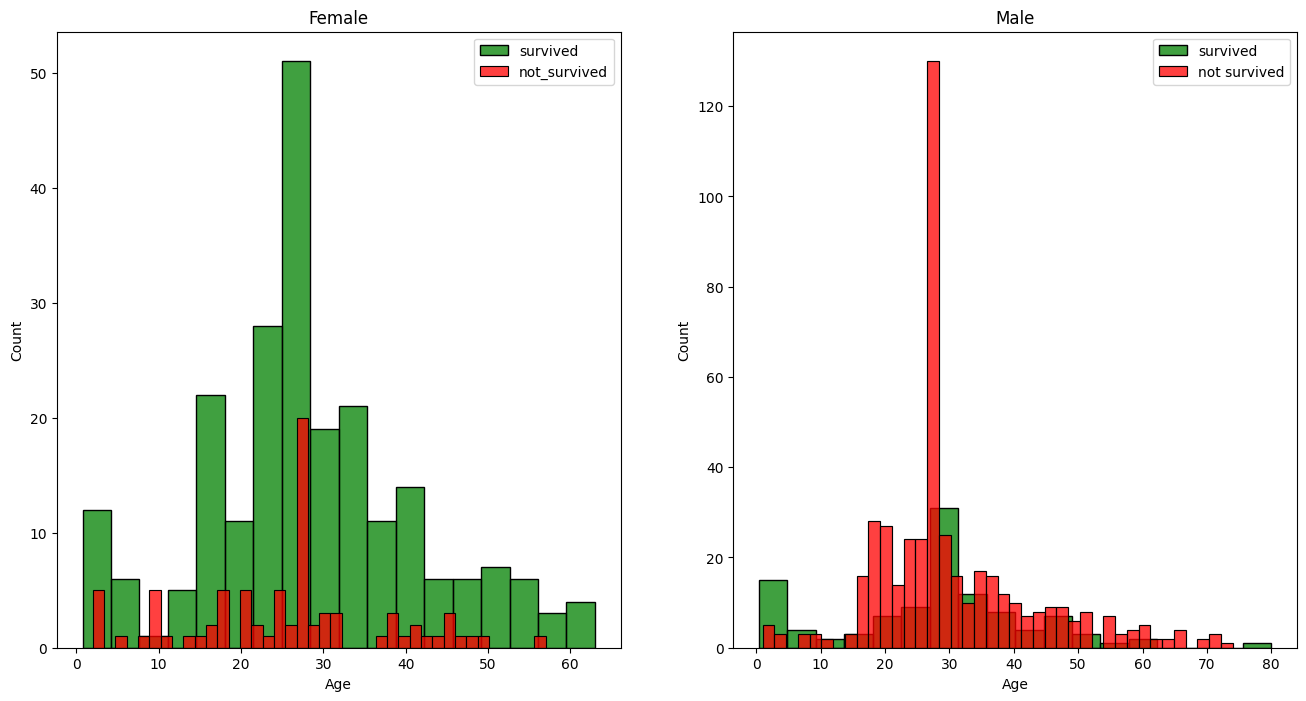

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
female = data[data["Sex"] == "female"]
male = data[data["Sex"] == "male"]
_ = sns.histplot(
    female[female["Survived"] == 1].Age,
    bins=18,
    label="survived",
    ax=axes[0],
    kde=False,
    color="green",
)
_ = sns.histplot(
    female[female["Survived"] == 0].Age,
    bins=40,
    label="not_survived",
    ax=axes[0],
    kde=False,
    color="red",
)
_.legend()
_.set_title("Female")
_ = sns.histplot(
    male[male["Survived"] == 1].Age,
    bins=18,
    label="survived",
    ax=axes[1],
    kde=False,
    color="green",
)
_ = sns.histplot(
    male[male["Survived"] == 0].Age,
    bins=40,
    label="not survived",
    ax=axes[1],
    kde=False,
    color="red",
    # legend=True,
)
_.legend()
_.set_title("Male");

### More Related to Age


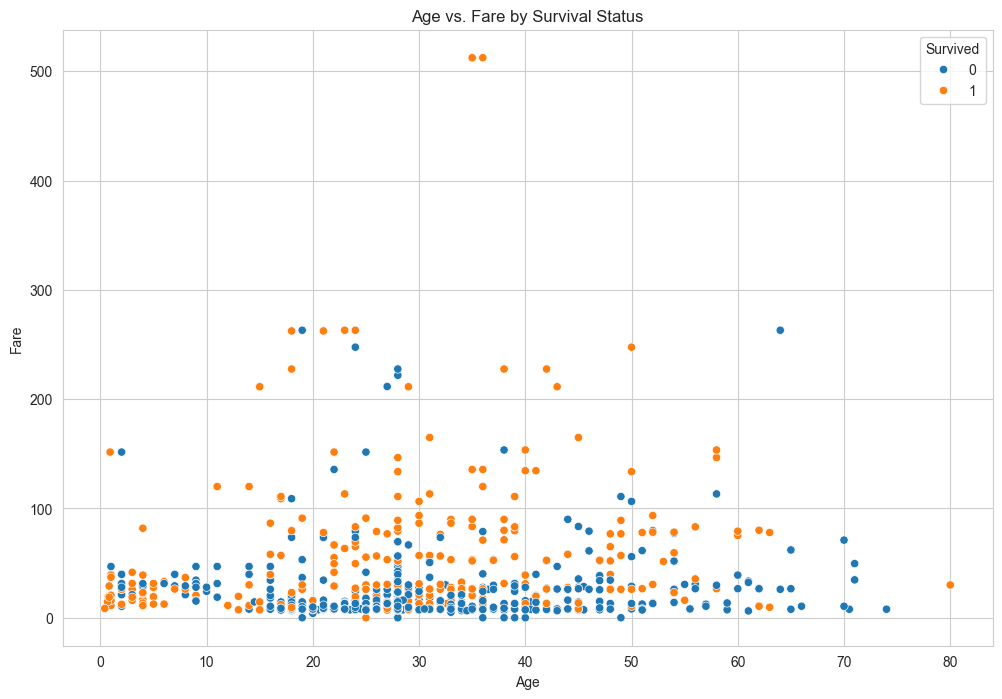

In [56]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data,
    x="Age",
    y="Fare",
    hue="Survived",
)
plt.title("Age vs. Fare by Survival Status")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.grid(True)
plt.show()

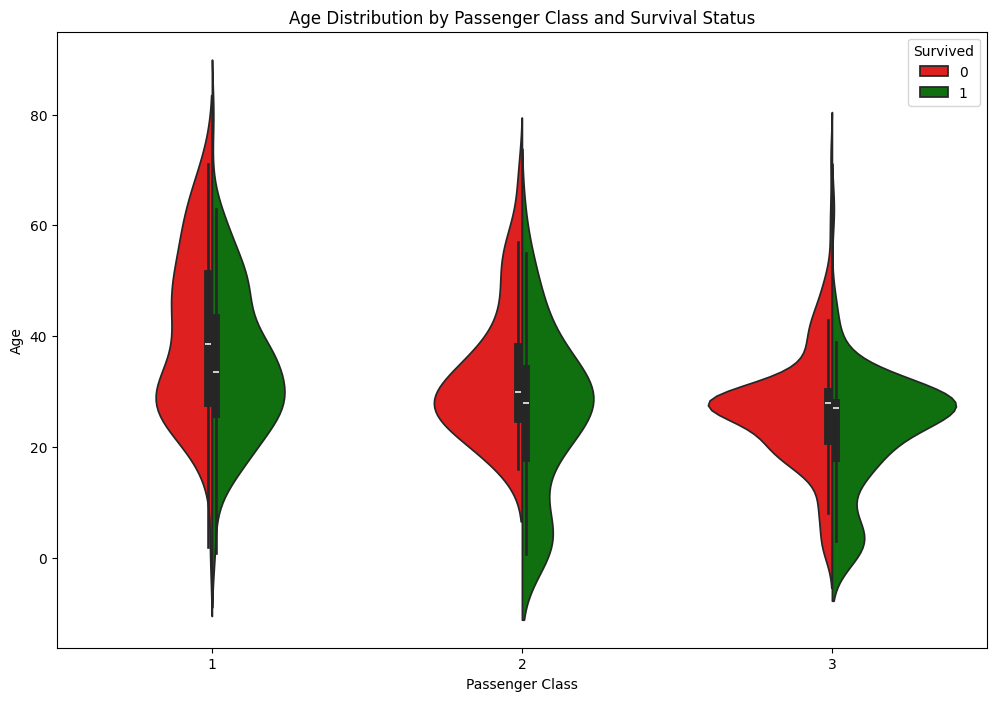

In [28]:
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=data,
    x="Pclass",
    y="Age",
    hue="Survived",
    split=True,
    palette={0: "red", 1: "green"},
)
plt.title("Age Distribution by Passenger Class and Survival Status")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()

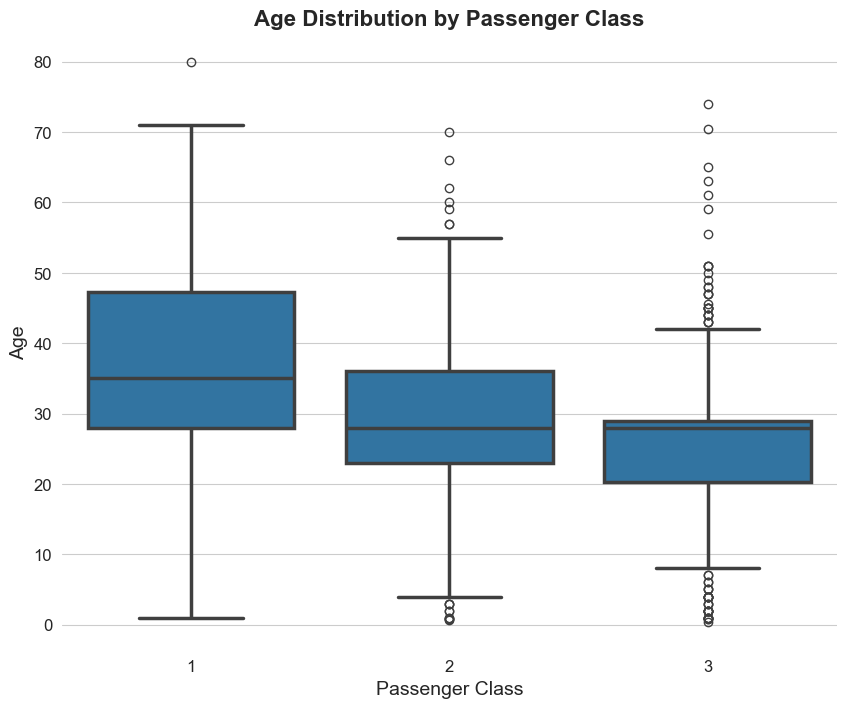

In [29]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

sns.boxplot(y="Age", x="Pclass", data=data, linewidth=2.5)

plt.title("Age Distribution by Passenger Class", fontsize=16, fontweight="bold")
plt.xlabel("Passenger Class", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)

plt.show()

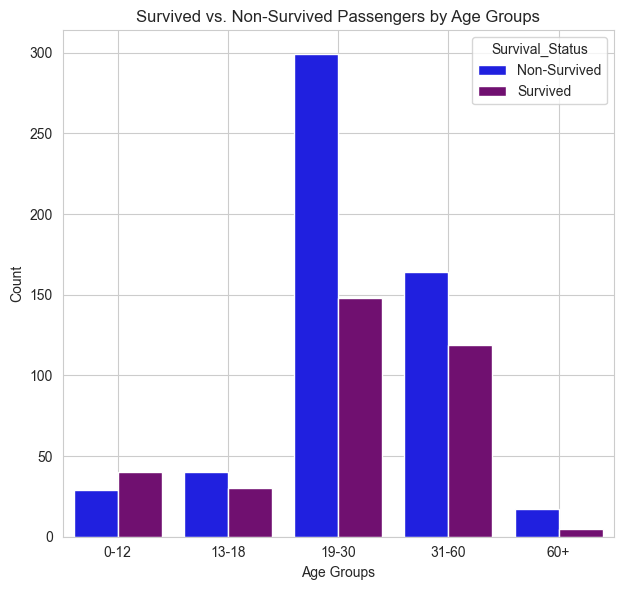

In [30]:
data["Survival_Status"] = data["Survived"].map({0: "Non-Survived", 1: "Survived"})

bins = [0, 12, 18, 30, 60, 100]
labels = ["0-12", "13-18", "19-30", "31-60", "60+"]
data["AgeGrp"] = pd.cut(data["Age"], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(
    x="AgeGrp",
    hue="Survival_Status",
    data=data,
    palette={"Survived": "purple", "Non-Survived": "blue"},
)
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.title("Survived vs. Non-Survived Passengers by Age Groups")
plt.grid(True)

plt.tight_layout()
plt.show()

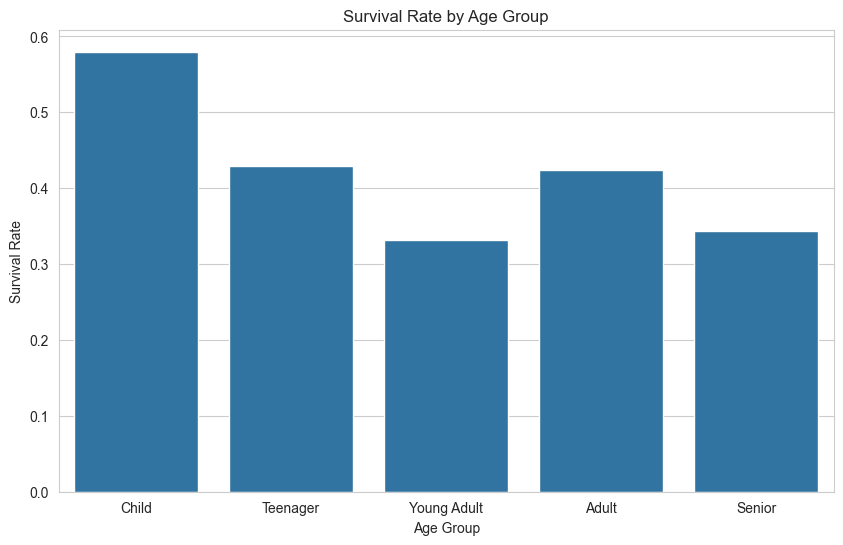

In [31]:
bins = [0, 12, 18, 30, 50, 80]
labels = ["Child", "Teenager", "Young Adult", "Adult", "Senior"]
data["AgeGroup"] = pd.cut(data["Age"], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.barplot(x="AgeGroup", y="Survived", data=data, errorbar=None)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

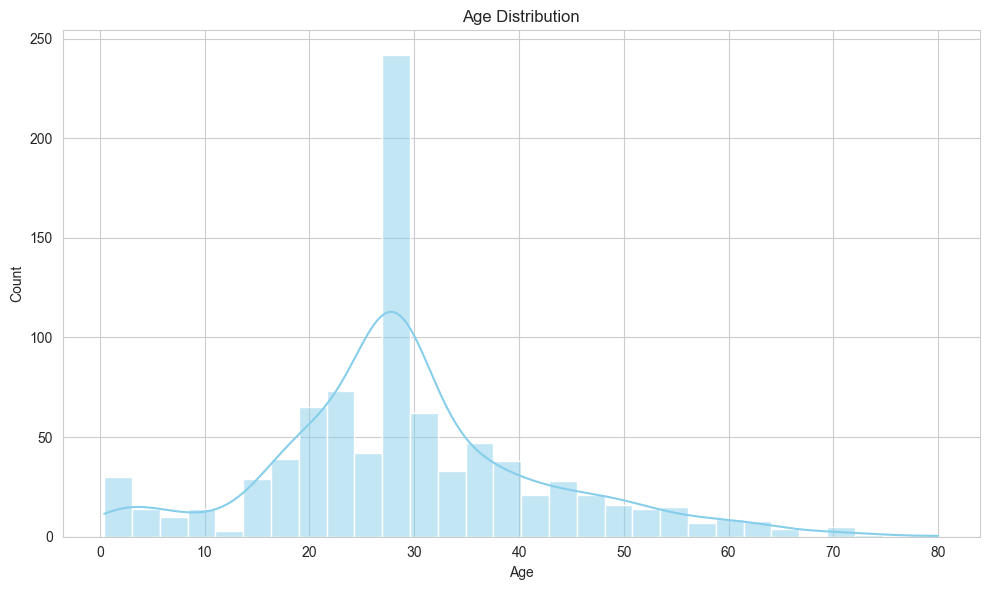

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Related to Class


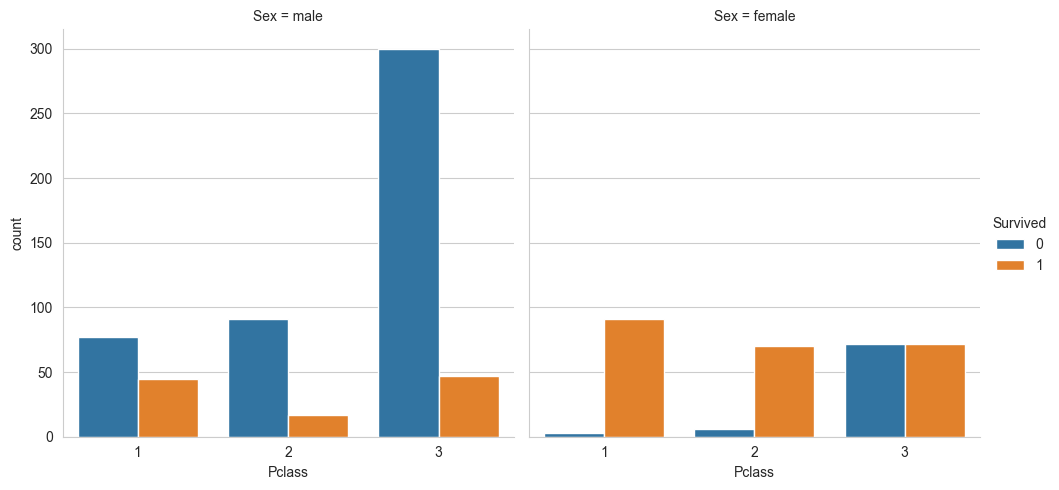

In [33]:
sns.catplot(x="Pclass", hue="Survived", col="Sex", data=data, kind="count")
plt.show()

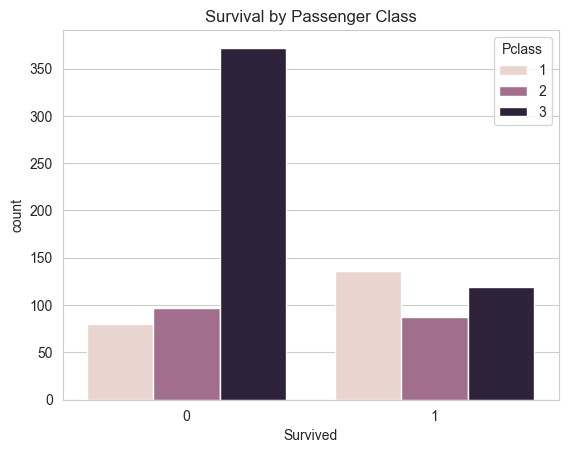

In [34]:
sns.countplot(x="Survived", hue="Pclass", data=data)
plt.title("Survival by Passenger Class")
plt.show()

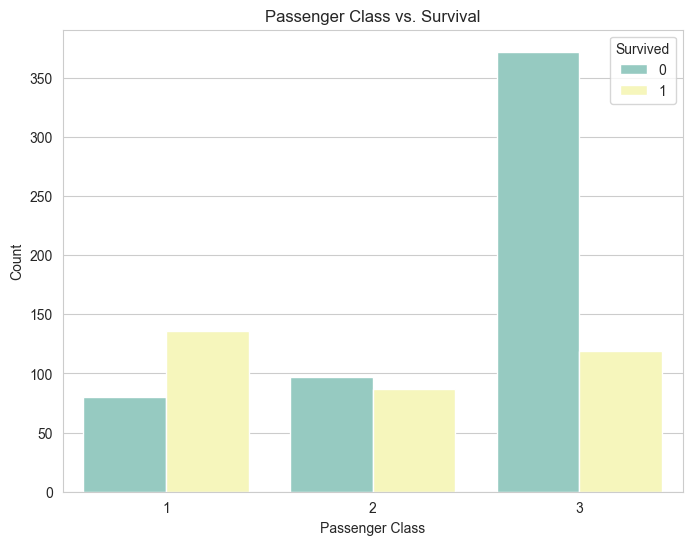

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Pclass", hue="Survived", palette="Set3")
plt.title("Passenger Class vs. Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

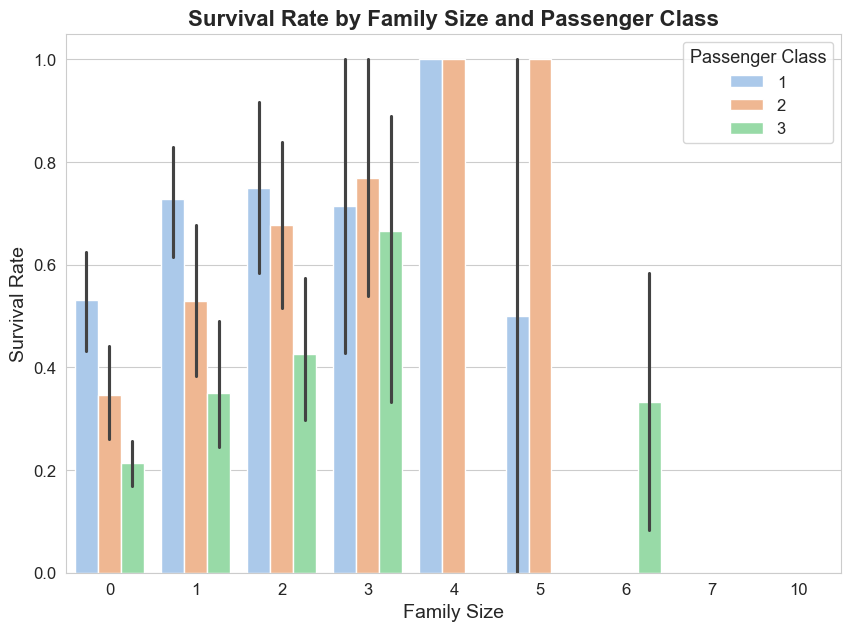

In [36]:
plt.figure(figsize=(10, 7))

sns.barplot(x='FamilySize', y='Survived', hue='Pclass', data=data, palette="pastel")

plt.title("Survival Rate by Family Size and Passenger Class", fontsize=16, fontweight='bold')
plt.xlabel("Family Size", fontsize=14)
plt.ylabel("Survival Rate", fontsize=14)
plt.legend(title="Passenger Class", fontsize=12, title_fontsize='13')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


##### Survival Rate by Passenger Class

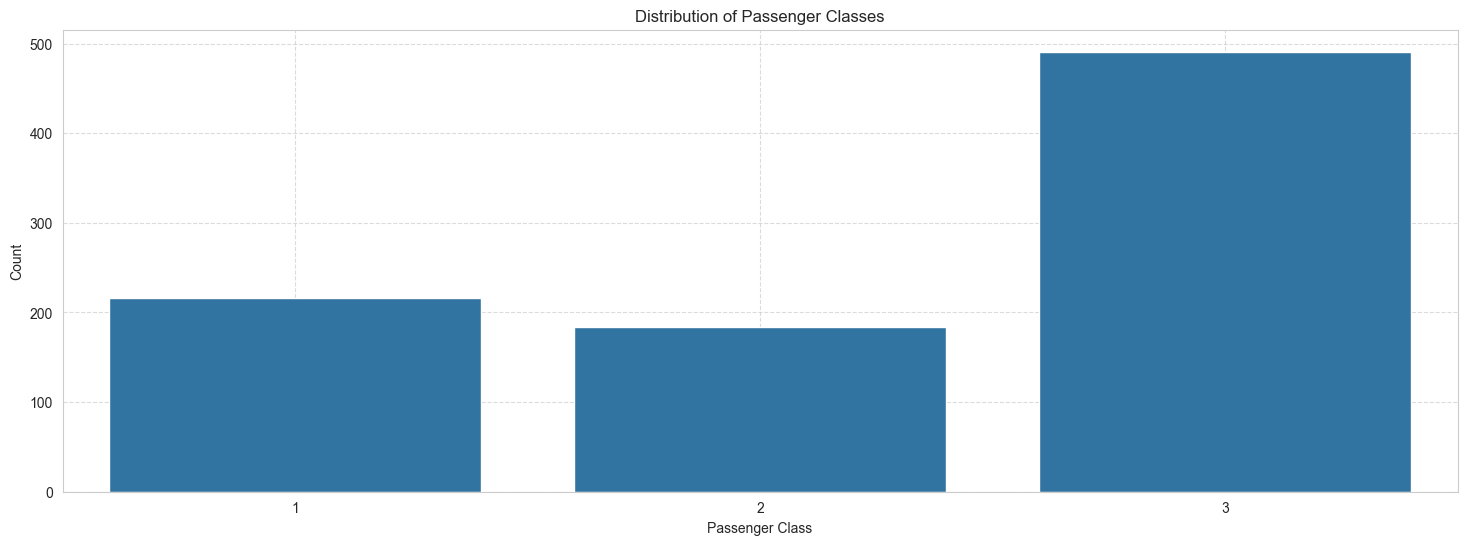

In [37]:
plt.figure(figsize=(18, 6))
# plt.subplot(1, 3, 1)
sns.countplot(x="Pclass", data=data)
plt.title("Distribution of Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.7)

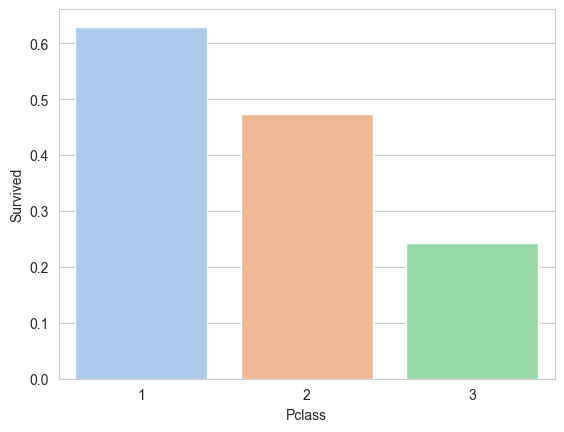

In [38]:
sns.barplot(x="Pclass", y="Survived", data=data, errorbar=None, hue="Pclass", palette="pastel", legend=False)
plt.show()

### Related to embarkation ports

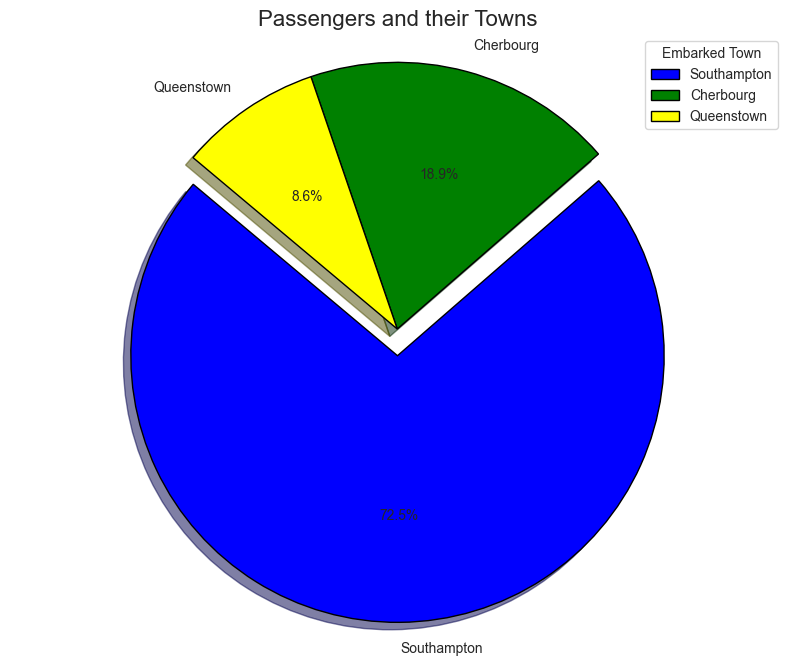

In [39]:
embarked_counts = data["Embarked"].value_counts()
labels = ["Southampton", "Cherbourg", "Queenstown"]
colors = ["blue", "green", "yellow"]
explode = (0.1, 0, 0)

plt.figure(figsize=(10, 8))
plt.pie(
    embarked_counts,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=140,
    wedgeprops={"edgecolor": "black"},
)
plt.title("Passengers and their Towns", fontsize=16)
plt.legend(title="Embarked Town", loc="upper right")
plt.axis("equal")
plt.show()

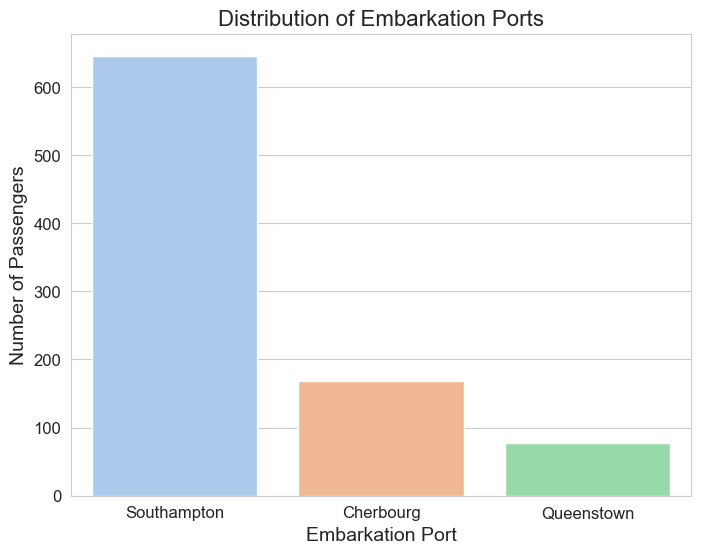

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Embarked", data=data, palette="pastel", hue="Embarked" )
plt.title("Distribution of Embarkation Ports", fontsize=16)
plt.xlabel("Embarkation Port", fontsize=14)
plt.ylabel("Number of Passengers", fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=["Southampton", "Cherbourg", "Queenstown"], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

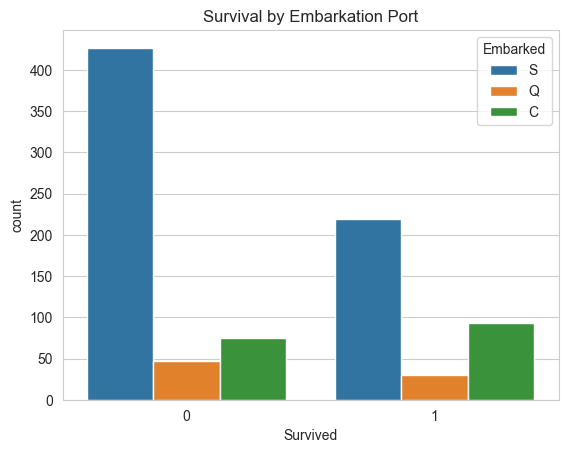

In [41]:
sns.countplot(x="Survived", hue="Embarked", data=data)
plt.title("Survival by Embarkation Port")
plt.show()

### General

Text(0, 0.5, 'Count')

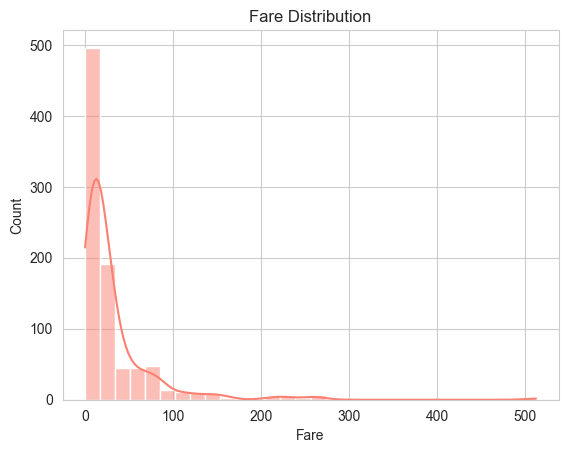

In [42]:
sns.histplot(data["Fare"], bins=30, kde=True, color="salmon")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")

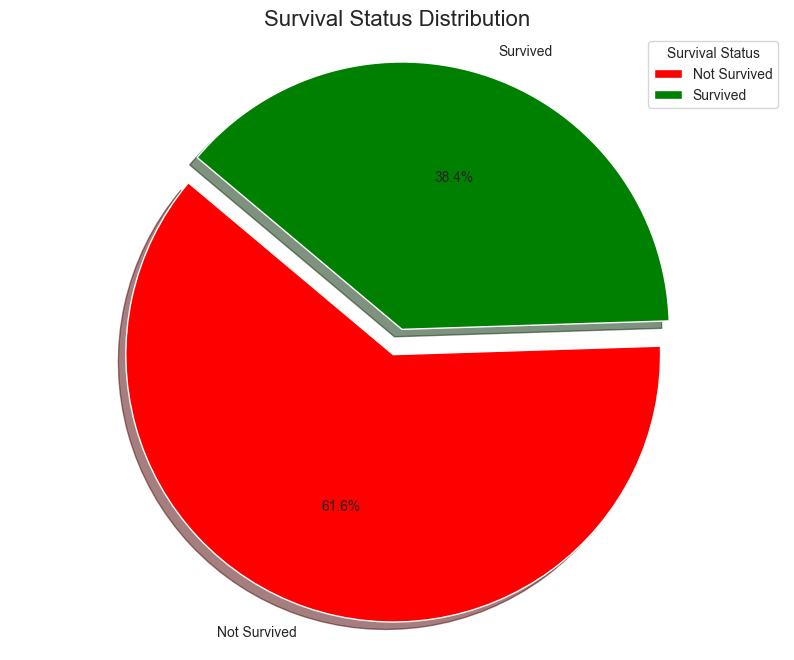

In [43]:
survival_counts = data["Survived"].value_counts()

labels = ["Not Survived", "Survived"]
colors = ["red","green"]
explode = (0.1, 0)

plt.figure(figsize=(10, 8))
plt.pie(
    survival_counts,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=140,
)
plt.title("Survival Status Distribution", fontsize=16)
plt.legend(title="Survival Status", loc="upper right")
plt.axis("equal")
plt.show()

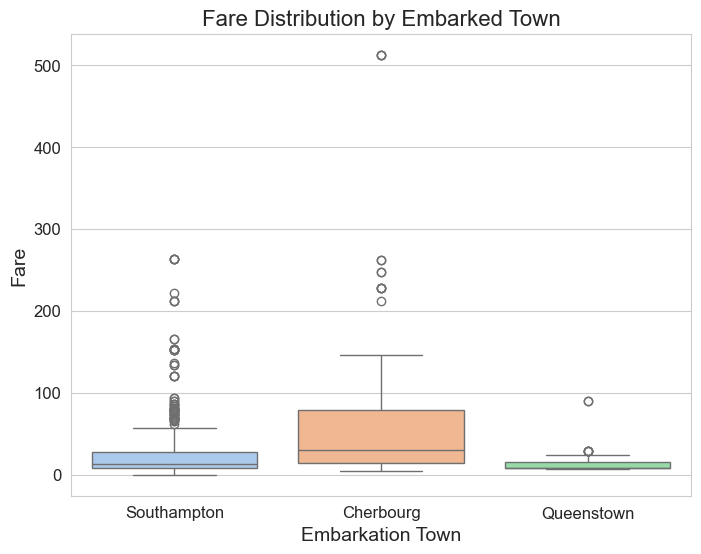

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Embarked', y='Fare', data=data, hue='Embarked', palette="pastel")
plt.title("Fare Distribution by Embarked Town", fontsize=16)
plt.xlabel("Embarkation Town", fontsize=14)
plt.ylabel("Fare", fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=["Southampton", "Cherbourg", "Queenstown"], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

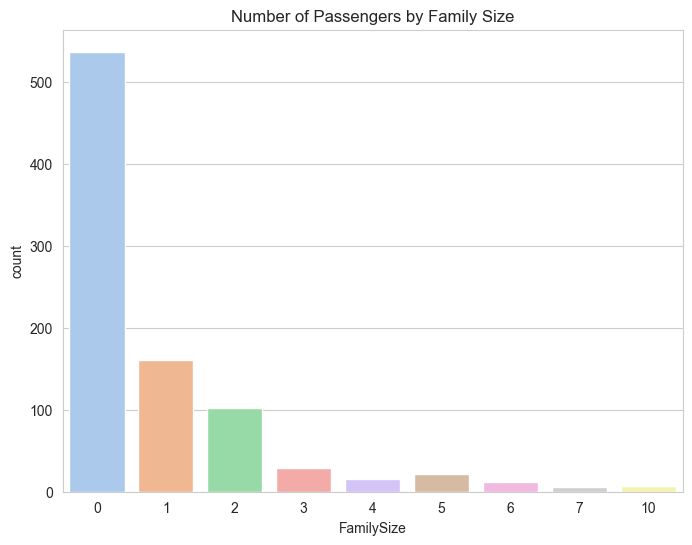

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='FamilySize', data=data, hue = 'FamilySize',palette="pastel", legend=False)
plt.title("Number of Passengers by Family Size")
plt.show()

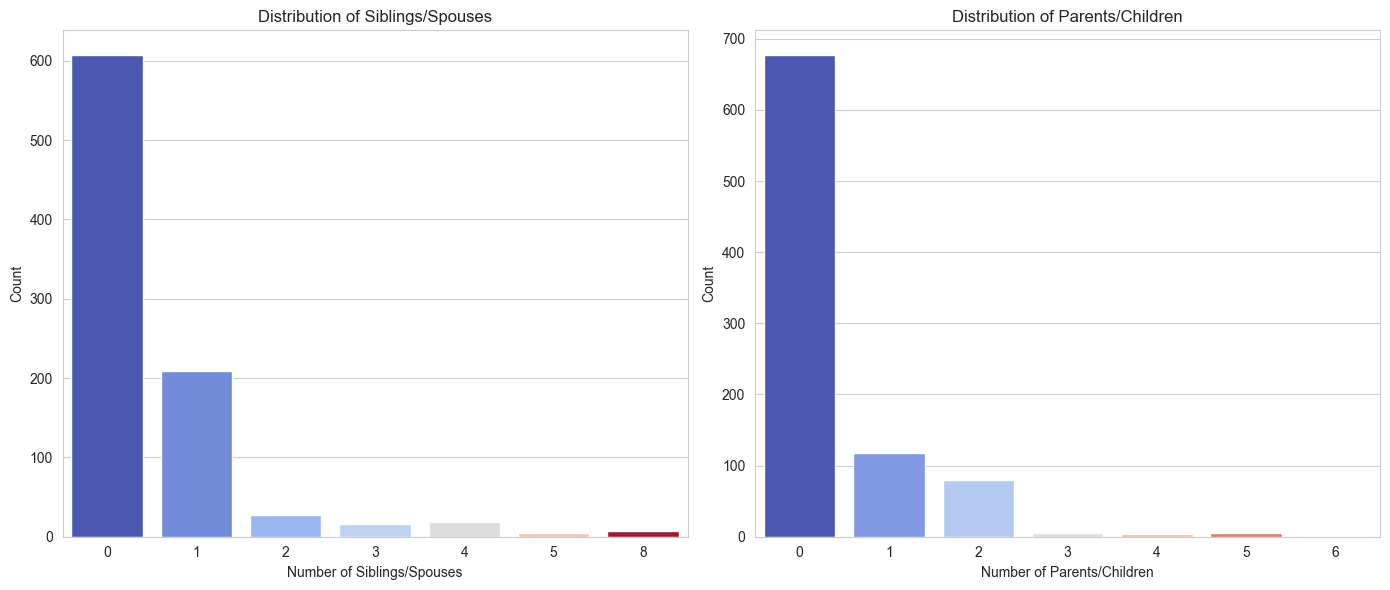

In [46]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x="SibSp", data=data, hue= "SibSp",palette="coolwarm" , legend=False)
plt.title("Distribution of Siblings/Spouses")
plt.xlabel("Number of Siblings/Spouses")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x="Parch", data=data, hue = "Parch",palette="coolwarm" , legend=False)
plt.title("Distribution of Parents/Children")
plt.xlabel("Number of Parents/Children")
plt.ylabel("Count")

plt.tight_layout()

plt.show()


#### Survival Rate by Gender

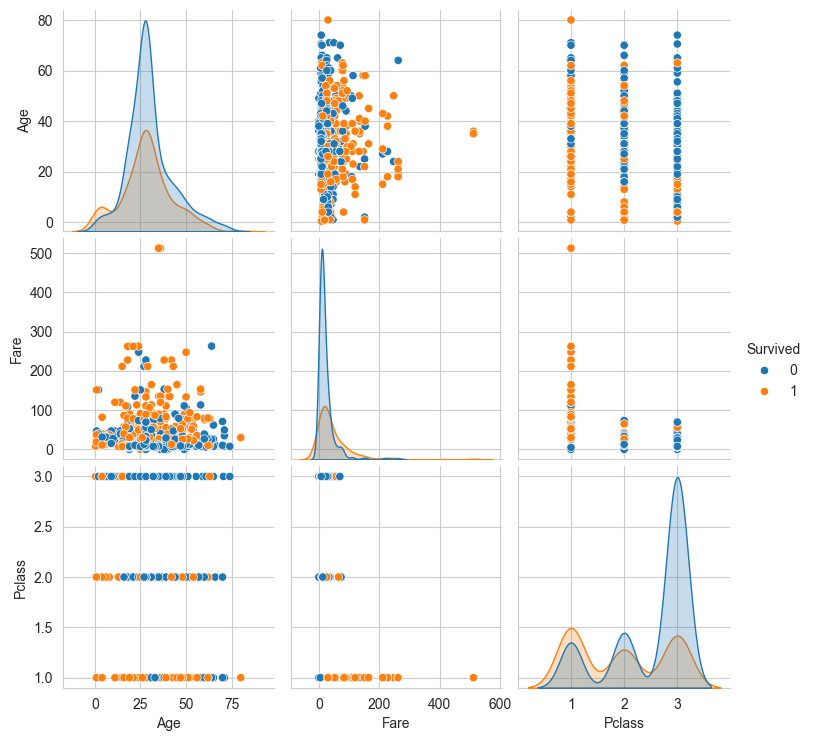

In [47]:
sns.pairplot(
    data[["Age", "Fare", "Pclass", "Survived"]],
    hue="Survived",
)
plt.show()

#### 3D Scatter Plot of Age, Fare, and Passenger Class by Survival Status


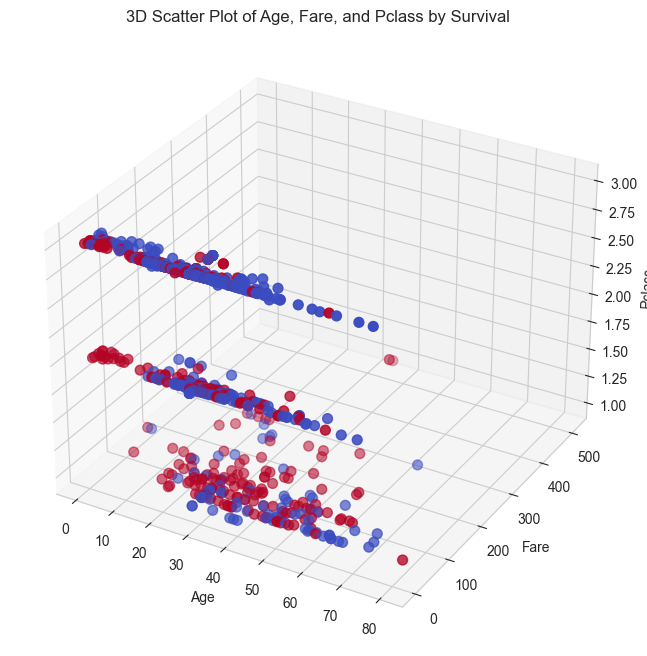

In [48]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Age'], data['Fare'], data['Pclass'], c=data['Survived'], cmap='coolwarm', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Pclass')
plt.title('3D Scatter Plot of Age, Fare, and Pclass by Survival')
plt.show()


#### Correlation Matrix of Numeric Features


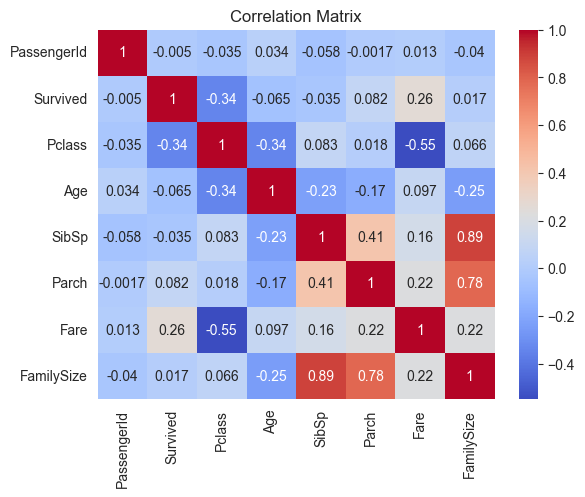

In [49]:
numeric = data.select_dtypes(include=[np.number])
correlation_matrix = numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## **Overall Summary:**

The analysis reveals that survival on the Titanic was influenced by multiple factors including gender, class, age, and family size. These findings provide insights into how social and economic factors affected survival chances during the disaster.
